In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ratings/desafio_ratings.csv
/kaggle/input/details/desafio_details.csv


In [3]:
#Importando as bibliotecas que serão utilizadas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Lendo os arquivos csv

details = pd.read_csv("/kaggle/input/details/desafio_details.csv", encoding='latin-1', sep=';')
ratings = pd.read_csv("/kaggle/input/ratings/desafio_ratings.csv", encoding='latin-1', sep=';')

imoveis = pd.merge(details, ratings, on='hotel_id')   #Juntando os dois arquivos csv

In [5]:
#Ordernando as cidades de forma crescente pelo número de listings

listings = imoveis['city_name'].value_counts().reset_index()      #Conta o número de listings de cada cidade nos Dados
listings.columns = ['city_name', 'listings']                      #Tabela com a cidade e o numero de listings
listings = listings.sort_values(by='listings', ascending=False)   #Deixando em ordem crescente

print(listings)


              city_name  listings
0         Florianópolis       762
1               Goiânia       138
2             Bombinhas        65
3               Ubatuba        35
4    Balneário Camboriú        35
5            Anitápolis        27
6      Campos do Jordão        24
7              Imbituba        23
8               Itapema        22
9          Porto Alegre        19
10            Cabo Frio        18
11              Gramado        14
12         Porto Seguro        12
13               Itajaí        10
14           Porto Belo        10
15               Canela         9
16      Arraial d'Ajuda         8
17             Brasília         8
18      Poços de Caldas         8
19             Garopaba         6
20               Búzios         5
22  Santa Cruz Cabrália         4
23          Hidrolândia         4
21               Ilhéus         4
24       Angra dos Reis         3
25              Urubici         2
26             Trancoso         2
27         Águas Claras         2
28           P

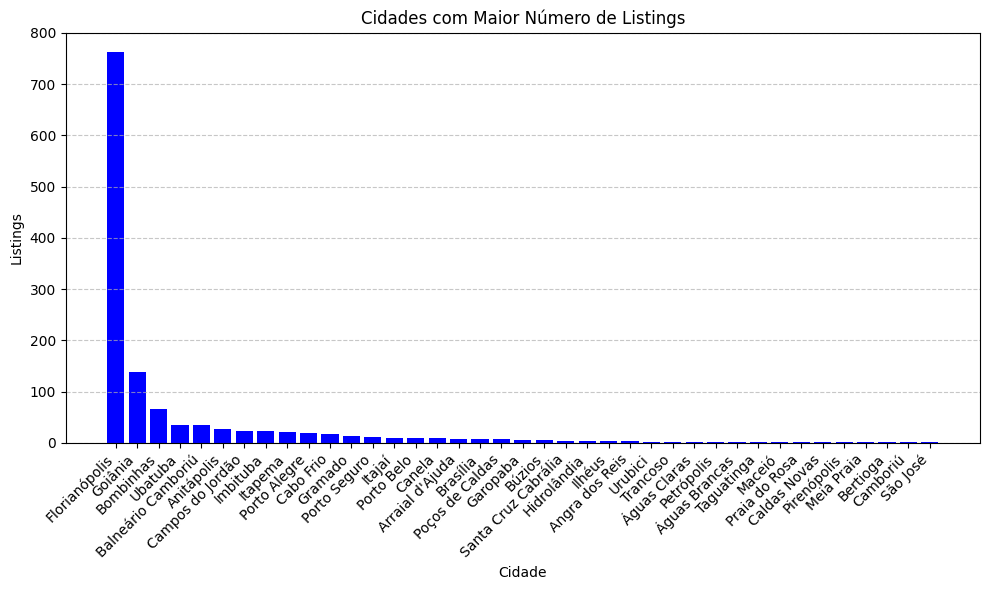

In [6]:
#Grafico com as top10 cidades com maior numero de listings

plt.figure(figsize = (10,6))
plt.bar(listings['city_name'], listings['listings'], color='blue')
plt.title('Cidades com Maior Número de Listings')
plt.xlabel('Cidade')
plt.ylabel('Listings')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [12]:
#Ordene as cidades em ordem decrescente de metros quadrados

imoveis1 = imoveis[['city_name', 'room_surface_in_m2']]

print(imoveis1)

#Nao entendi a pergunta, mas penso em fazer a media do room surface de todos os ap da cidade e depois comparar entre as cidades

          city_name  room_surface_in_m2
0           Ubatuba              220.00
1           Goiânia               48.00
2     Florianópolis              170.00
3     Florianópolis               32.00
4            Ilhéus              134.74
...             ...                 ...
1286      Bombinhas               50.00
1287      Bombinhas               53.00
1288      Bombinhas               50.00
1289      Bombinhas               50.00
1290      Bombinhas               80.00

[1291 rows x 2 columns]


In [59]:
#Quais cidades têm mais avaliações?

Numero_avaliacoes= imoveis.groupby('city_name')['number_of_ratings'].sum().reset_index()       #Somando todos as avaliações de cada cidade
Numero_avaliacoes = Numero_avaliacoes.sort_values(by='number_of_ratings', ascending=False)     #Ordem crescente 

print(Numero_avaliacoes.head(10))                                                              #Printando o top10 com mais avaliaçoes

             city_name  number_of_ratings
13       Florianópolis              87353
1           Anitápolis               2106
11    Campos do Jordão               1815
5            Bombinhas               1126
15             Goiânia                531
3   Balneário Camboriú                 54
20              Itajaí                 23
21             Itapema                 19
16             Gramado                 15
35             Ubatuba                 15


In [73]:
#Quais cidades têm a maior média de avaliações? E a menor média?

def juntando(linha):
    if pd.notna(linha['number_of_ratings']):                        #Para cada linha da coluna number_of_ratings será verdadeiro caso NÂO for NaN
        linha['Total'] = linha['Total']* linha['number_of_ratings'] #Multiplicando a nota total pelo numero de avaliaçoes
    else:
        linha['Total'] = linha['Total']                             #Caso for FALSO não vai multiplicar nada
    
    return linha                                           
 
avaliacoes = imoveis.apply(juntando, axis=1)
avaliacoes = avaliacoes[['city_name', 'number_of_ratings', 'Total']]
avaliacoes = avaliacoes.groupby('city_name').agg({'Total': 'sum', 'number_of_ratings': 'sum'}).reset_index()  #Somando todas as notas da cidade
avaliacoes['Nota_media'] = avaliacoes['Total']/avaliacoes['number_of_ratings']
avaliacoes['Nota_media'] = avaliacoes['Nota_media'].apply(lambda x: round(x, 2))                              #Deixando com duas casa decimais
avaliacoes = avaliacoes.sort_values(by='Nota_media', ascending=False)

avaliacoes[['city_name','Nota_media']].head(10)

,city_name,Nota_media
0,Angra dos Reis,10.00
6,Brasília,10.00
18,Ilhéus,10.00
27,Porto Belo,9.75
24,Petrópolis,9.62
32,São José,9.50
8,Cabo Frio,9.50
35,Ubatuba,9.47
1,Anitápolis,9.40
14,Garopaba,9.33


In [ ]:
#Plotando o gráfico de numero de avaliações com Nota media



In [ ]:
#Existem correlações entre as características de um anúncio e a sua localização?

In [23]:
lista_city = imoveis['city_name'].unique()

i = 0
for i in range len(lista_city):
    if imoveis[imoveis['city_name'] == 'list_city[i]'][['city_name', 'number_of_ratings']] != 0
        

avaliacoes = imoveis.groupby('city_name')['number_of_ratings'].sum().reset_index()

#print(avaliacoes)
print(lista_city[2])

Florianópolis


In [32]:
lista_city = imoveis['city_name'].unique()
i = 3
imoveis[imoveis['city_name'] == lista_city[i]][['city_name', 'number_of_ratings']]

,city_name,number_of_ratings
4,Ilhéus,0
75,Ilhéus,0
266,Ilhéus,2
267,Ilhéus,1
